## Assignment 8
#### Name: Eve Tarpey Date: 19/02/2024
-------------------------------------------------------------------------------------------------------------------------
#### Fourier Transforms: Image analysis


In this assignment, we will look performing Fourier analysis on different images.

### Task 1: Draw other shapes using similar code that is in the task
I will draw a rectangle, much like the code in the task, with a few changes. I will also draw a cross and a circle.


In [1]:
# import Image and ImageDraw for creating and drawing images
from PIL import Image as im, ImageDraw as imd        
import pylab                                                     # import pylab to display the images
import numpy as np                                               # import numpy as np to use mathematical operations
import matplotlib.pyplot as plt                                  # import matplotlib.pyplot as plt to plot our graphs 
%matplotlib inline

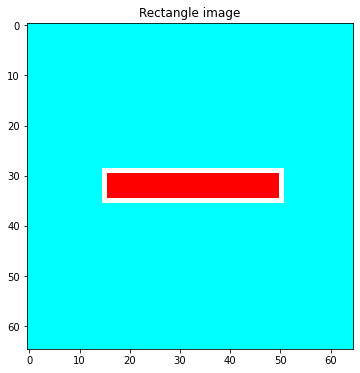

In [2]:
# sample code
width, height = 65, 65                                  
rectangle = [(50, 29), (width - 50, height - 30)]         

# create an "RGB" image with black colour for the background
rectangle_image = im.new("RGB", (width, height), color="cyan")   

# create a drawing context for rectangle_image and draw the rectangle onto rectangle_image using "rectangle" coords
draw = imd.Draw(rectangle_image)                        
draw.rectangle(rectangle, fill="red", outline="white")  

plt.figure(figsize=(10, 6))                                      # controls the size of the plot
pylab.imshow(rectangle_image)                                    # display the image of the rectangle
pylab.title("Rectangle image")                                   # title the image
pylab.show()                                                     # show the image

Copying a similar layout to the sample code, I will make an image of the cross.

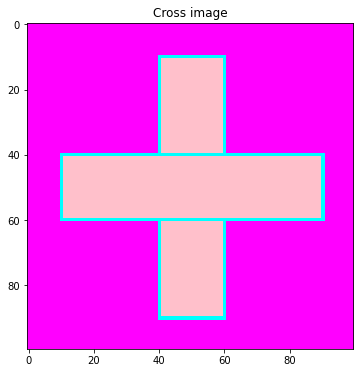

In [3]:
# define the width and height variables to specify the image dimensions and the coordinates of the cross
width, height = 100, 100 

# create an "RGB" image 
cross_image = im.new("RGB", (width, height), color="magenta") 

# create a drawing context for cross_image
draw = imd.Draw(cross_image)                  

rectangle1 = [(40,90), (60,10)]                                  # define the coordinates for the vertical rectangle 
rectangle2 = [(90,40), (10,60)]                                  # define the coordinates for the horizontal rectangle
  
# draw the rectangles
draw.rectangle(rectangle1, fill="pink", outline = "cyan")
draw.rectangle(rectangle2, fill="pink", outline = "cyan")

plt.figure(figsize=(10, 6))                                      # controls the size of the plot
pylab.imshow(cross_image)                                        # display the image of the cross
pylab.title("Cross image")                                       # title the image
pylab.show()                                                     # show the image

In the next code I will be using functions instead of a similar code to the sample code.

---------------------------------------------------------------------------------------------------------------------
In computer graphics, when we want to draw a shape like a circle we need to define a bounding box around it. 

For a circle, the bounding box is a rectangle with sides parallel to the image axes, and it's defined by its top left and bottom right corners. 

##### The top left corner of the bounding box is calculated by:
top_left_x = centre_x - radius

top_left_y = centre_y - radius
##### The bottom right corner of the bounding box is calculated by:
bottom_right_x = centre_x + radius

bottom_right_y = centre_y + radius


Hence, the tuple contains these four values:

bounding_box = (top_left_x, top_left_y, bottom_right_x, bottom_right_y)

These values define a rectangle that bounds the circle, and it's this bounding box that is used to draw the circle on the image.


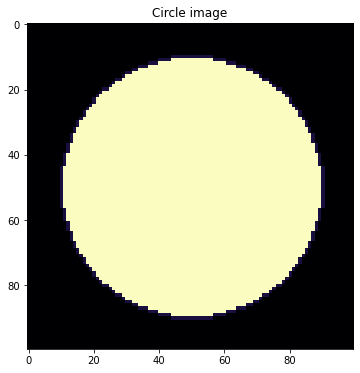

In [4]:
# define a function that takes the width, the height, and the radius 
def circle_image_function(width, height, radius):
    
    circle_image = im.new("I", (width, height))                  # create an "RGB" image 
    draw = imd.Draw(circle_image)                                # create a drawing context for circle_image
    
    centre_x, centre_y = width // 2, height // 2                 # calculate the centre coordinates
    
    # calculate the bounding box coordinates
    top_left_x = centre_x - radius
    top_left_y = centre_y - radius
    bottom_right_x = centre_x + radius
    bottom_right_y = centre_y + radius
    
    # define a tuple containing the bounding box coordinates
    bounding_box = (top_left_x, top_left_y, bottom_right_x, bottom_right_y)
    
    # draw the circle using the "bounding_box" coordinates
    draw.ellipse(bounding_box, fill="white", outline="blue")  
    
    return circle_image                                          # return the generated circle image

# define a function to display the circle 
def display_circle(circle):
    plt.figure(figsize=(10, 6))                                  # controls the size of the plot
    plt.imshow(np.abs(circle), cmap="magma")                     # to display the image of the circle
    plt.title("Circle image")                                    # to title the image
    plt.show()                                                   # to show the image

circle_image = circle_image_function(100, 100, 40)               # call the function with width, height and radius values
display_circle(circle_image)                                     # display the image

#### Task 2: Perform a Fourier analysis on your images. 

The code should do each of the following:
- Draw 2 separate images
- Take the 2D discrete Fourier transform of the images
- Apply a gaussian filter to the images
- Take the inverse transform of the images 
- Display the blurred images

#### Sub task 1: draw two separate images

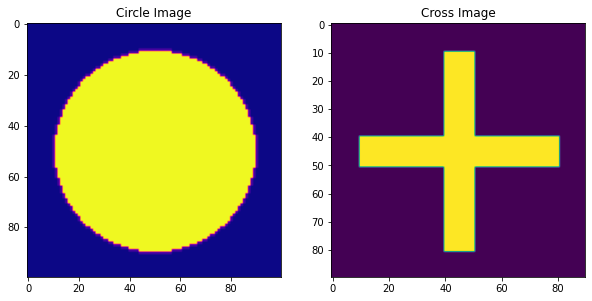

In [5]:
# define a function that takes the width, height, vertical cross coordinates and horizontal cross coordinates
def cross_image_function(width, height, rectangle1, rectangle2):
    
    cross_image = im.new("I", (width, height))                   # create an "I" image 
    draw =imd.Draw(cross_image)                                  # create a drawing context for "cross_image"
    
    # draw the rectangles
    draw.rectangle(rectangle1, fill="white", outline="white")
    draw.rectangle(rectangle2, fill="white", outline="white")
    
    return cross_image                                           # return the generated cross image

# define a function that displays both the cicle and cross images side by side
def display_images(circle, cross):
    plt.figure(figsize=(10, 6))                                  # controls the size of the plot
    plt.subplot(1, 2, 1)                                         # create subplot 1 in a 1x2 grid
    plt.imshow(np.abs(circle), cmap="plasma")                    # display the circle image
    plt.title("Circle Image")                                    # title subplot 1

    plt.subplot(1, 2, 2)                                         # create subplot 2 in a 1x2 grid
    plt.imshow(np.abs(cross), cmap="viridis")                    # display the square image
    plt.title("Cross Image")                                     # title subplot 2
    plt.show()                                                   # Show both images

# call the function with width, height, vertical cross coordinates and horizontal cross coordinates, respectively
cross_image = cross_image_function(90, 90, [(40, 80), (50, 10)], [(80, 40), (10, 50)])

# call the function with width, height and radius values, respectively
circle_image = circle_image_function(100, 100, 40)    

# Display the images
display_images(circle_image, cross_image)


#### Sub task 2: Take the 2D discrete Fourier transform of the images

The functions imported from scipy.fft and scipy.ndimage modules are used for signal processing and image processing tasks, respectively.    
    
- fft2: 
This function computes the 2-dimensional discrete Fourier transform (DFT) of an input array. It represents the frequency content of the input signal or image in the frequency domain.


- ifft2: This function computes the 2-dimensional inverse discrete Fourier transform (IDFT) of an input array. It reconstructs the original signal or image from its frequency-domain representation obtained using fft2. The resulting array represents the spatial domain representation of the signal or image.


- fftshift: This function shifts the zero-frequency component of the Fourier transform to the center of the array. It reorganizes the frequency components in the output of fft2 to make low frequencies appear at the center of the array, which is often more intuitive for visualization and further processing.


- gaussian_filter: This function applies a Gaussian filter to an input array, typically an image, to perform Gaussian smoothing or blurring. It convolves the input array with a Gaussian kernel to reduce noise and blur the image. The sigma parameter controls the standard deviation of the Gaussian kernel, which determines the amount of smoothing or blurring applied to the image.

I sourced this from the internet, just to wrap my head around the functions.
I left the information in, just as a reference.

In [6]:
from scipy.fft import fft2, ifft2, fftshift                      # import for signal processing
from scipy.ndimage import gaussian_filter as gf                  # import for image processing

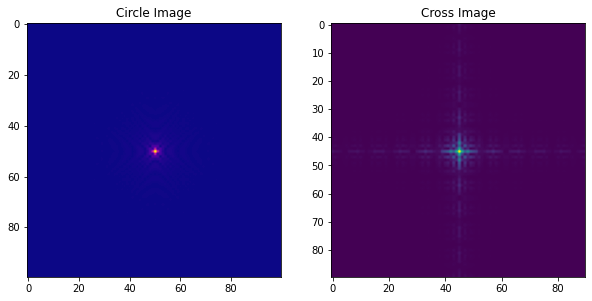

In [7]:
# define a function that will perform a 2D discrete fourier transform (DFT) on the input image
def fourier_analysis(image):
    
    # computes the 2D DFT of the input image
    fft = np.fft.fft2(image)                             
    
    # shifts the zero frequency component of the DFT to the centre of the image                 
    fft_shifted = np.fft.fftshift(fft)                   

    return fft_shifted                                           # returns the shifted DFT 

fourier_circle = fourier_analysis(circle_image)
fourier_cross = fourier_analysis(cross_image)

# display the 2D discrete fourier transform image of the circle
display_images(fourier_circle, fourier_cross)

#### Sub task 3: Apply a gaussian filter to the image

Gaussian Filter: A Gaussian Filter is used in reducing noise in the image, and also the details of the image. The Gaussian function is based on the size of $\sigma$.
It is defined as:
$$ G_\sigma =\frac{1}{2 \pi {\sigma}^2} e^{-\frac{(x^2 +y^2)}{2 {\sigma}^2}}$$
where x is the distance from the origin in the horizontal axis, y is the distance from the origin
in the vertical axis, and σ is the standard deviation of the Gaussian distribution.

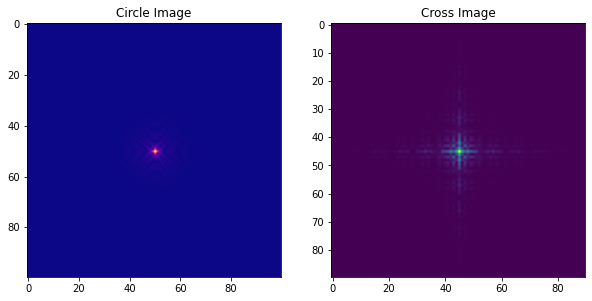

In [8]:
# define a function that creates a 2D Gaussian filter in the frequency domain
def gaussian_filter_function(fft_shifted, sigma):
    
    rows, columns = fft_shifted.shape                            # retrieves the dimensions of the shifted DFT
    
    # create 1D arrays that represent the indices along the rows and columns of the transformed image
    r = np.arange(rows)
    c = np.arange(columns)
    
    # create 2D grids that represent the spatial frequencies corresponding to each pixel in the transformed image
    # the subtraction of rows // 2 and columns // 2 shifts the zero frequency component to the centre of the grids
    R, C = np.meshgrid(r - rows // 2, c - columns // 2)
    
    # compute the 2D Gaussian filter in the frequency domain using the formula above
    gaussian_filter = (1 / (2*np.pi*sigma**2))*np.exp(-(R**2+C**2)/(2*sigma**2))

    # apply the Gaussian filter to the transformed image
    filtered_fft = fft_shifted * gaussian_filter

    return filtered_fft                                          # returns the filtered transformed image


gaussian_circle = gaussian_filter_function(fourier_circle, 20)
gaussian_cross = gaussian_filter_function(fourier_cross, 20)

# display the image of the circle and cross with the gaussian filter applied
display_images(gaussian_circle, gaussian_cross)

#### Sub task 4: Take the inverse transform of the image 

In [9]:
# define a function that performs the inverse fourier transform to obtain the blurred image
def inverse_fourier_transform(filtered):
    
    # take the inverse transform to obtain the blurred image in the spatial domain 
    # .real is used to retain the real part of the inverse transformed image
    blurred_image = np.fft.ifft2(np.fft.ifftshift(filtered)).real

    return blurred_image                                         # returns the blurred image

inverse_circle = inverse_fourier_transform(gaussian_circle)
inverse_cross = inverse_fourier_transform(gaussian_cross)

#### Sub task 5: Display the blurred image

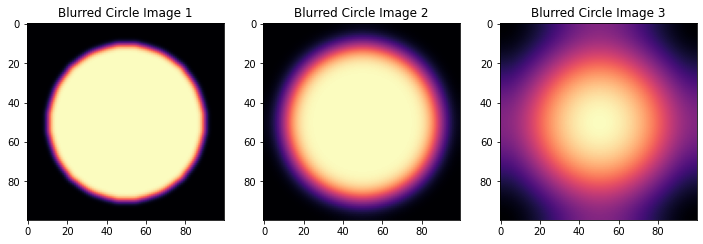

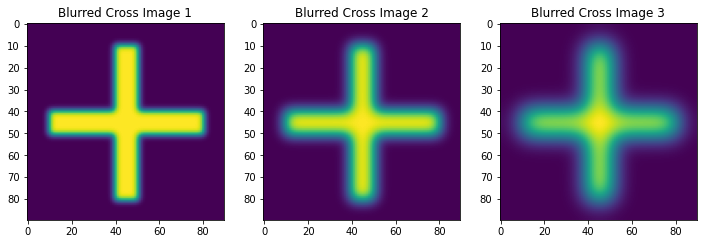

In [10]:
# define functions that display two blurred images side by side
def display_circleimages(blurred_image1, blurred_image2, blurred_image3):
    plt.figure(figsize=(12, 8))                                  # controls the size of the plot
    plt.subplot(1, 3, 1)                                         # create subplot 1 in a 1x3 grid
    plt.imshow(np.abs(blurred_image1), cmap="magma")             # display the image
    plt.title("Blurred Circle Image 1")                          # title subplot 1

    plt.subplot(1, 3, 2)                                         # create subplot 2 in a 1x3 grid
    plt.imshow(np.abs(blurred_image2), cmap="magma")             # display the image
    plt.title("Blurred Circle Image 2")                          # title subplot 2
    
    plt.subplot(1, 3, 3)                                         # create subplot 3 in a 1x3 grid
    plt.imshow(np.abs(blurred_image3), cmap="magma")             # display the image
    plt.title("Blurred Circle Image 3")                          # title subplot 3
    plt.show()                                                   # show images
    
def display_crossimages(blurred_image11, blurred_image22, blurred_image33):
    plt.figure(figsize=(12, 8))                                  # controls the size of the plot
    plt.subplot(1, 3, 1)                                         # create subplot 1 in a 1x3 grid
    plt.imshow(np.abs(blurred_image11), cmap="viridis")          # display the image
    plt.title("Blurred Cross Image 1")                           # title subplot 1

    plt.subplot(1, 3, 2)                                         # create subplot 2 in a 1x3 grid
    plt.imshow(np.abs(blurred_image22), cmap="viridis")          # display the image
    plt.title("Blurred Cross Image 2")                           # title subplot 2
    
    plt.subplot(1, 3, 3)                                         # create subplot 3 in a 1x3 grid
    plt.imshow(np.abs(blurred_image33), cmap="viridis")          # display the image
    plt.title("Blurred Cross Image 3")                           # title subplot 3
    plt.show()                                                   # show images
      
# apply a Gaussian filter to the frequency domain representation of the image 

# use sigma = 10 for a less blurred image
filtered_fft_circle1 = gaussian_filter_function(fourier_circle, 10)  

# take the inverse transform to get blurred circle 1
blurred_circle1 = inverse_fourier_transform(filtered_fft_circle1)        

# use sigma = 3 for a blurry image
filtered_fft_circle2 = gaussian_filter_function(fourier_circle, 3)

# take the inverse transform to get blurred circle 2
blurred_circle2 = inverse_fourier_transform(filtered_fft_circle2)     

# use sigma = 1 for a very blurry image
filtered_fft_circle3 = gaussian_filter_function(fourier_circle, 1) 

# take the inverse transform to get blurred circle 3
blurred_circle3 = inverse_fourier_transform(filtered_fft_circle3)    

# use sigma = 10 for a less blurred image
filtered_fft_cross1 = gaussian_filter_function(fourier_cross, 10)  

# take the inverse transform to get blurred cross 1
blurred_cross1 = inverse_fourier_transform(filtered_fft_cross1)      

# use sigma = 5 for a blurry image
filtered_fft_cross2 = gaussian_filter_function(fourier_cross, 5)     

# take the inverse transform to get blurred cross 2
blurred_cross2 = inverse_fourier_transform(filtered_fft_cross2)        

# use sigma = 3 for a very blurry image
filtered_fft_cross3 = gaussian_filter_function(fourier_cross, 3) 

# take the inverse transform to get blurred cross 3
blurred_cross3 = inverse_fourier_transform(filtered_fft_cross3)        

# display the final blurred images
display_circleimages(blurred_circle1, blurred_circle2, blurred_circle3)
display_crossimages(blurred_cross1, blurred_cross2, blurred_cross3)

### Task 3: format your code so that the Fourier analysis is contained in a function that can be applied to any image you draw.

I have already done this, so I will move onto part 4 :)


### Task 4: Write a python program that loads and displays an image, and then computes the Discrete Fourier Transform of the image.

Your code needs to:
- Display the original image
- Compute the 2D discrete Fourier Transform
- Shift the zero-frequency component to the centre of the spectrum.
- Take the log of the spectrum to compress the range of value.
- Display the Magnitude Spectrum image.


#### Display the original image of the cat

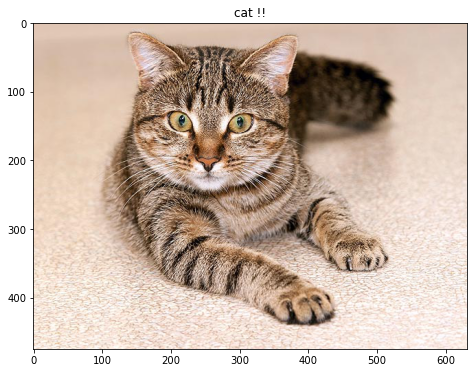

In [11]:
cat = im.open("cat.jpg")                                         # define cat to be the cat image
plt.figure(figsize=(10, 6))                                      # controls the size of the plot
pylab.imshow(cat)                                                # display the image of the cat
pylab.title("cat !!")                                            # title the image
pylab.show()                                                     # show the image

####  Compute the 2D discrete Fourier Transform, shift the zero-frequency component to the centre of the spectrum, take the log of the spectrum to compress the range of value and  display the Magnitude Spectrum image.

Within my "fourier_analysis" function, the 2D discrete Fourier Transform is computed and the zero-frequency component is shifted to the centre of the spectrum.

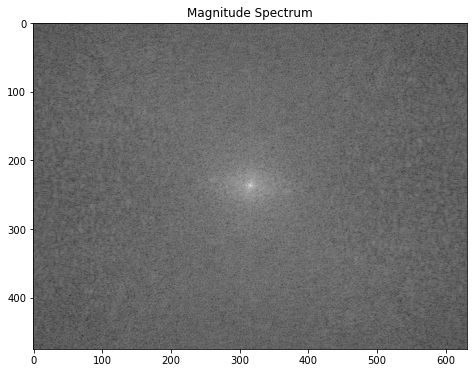

In [12]:
I_cat = im.new("I", cat.size)                                 # create a blank image with the same size as the cat image
I_cat.paste(cat, None)                                           # paste the cat image onto the blank image

fourier_cat = fourier_analysis(I_cat)                            # perform Fourier analysis on the cat image

magnitude_spectrum = np.abs(fourier_cat)                         # calculate the magnitude spectrum

log_magnitude_spectrum = np.log(magnitude_spectrum)              # take the log of the spectrum to compress the range

# define a function to display the spectrum
def display_spectrum(spectrum):
    plt.figure(figsize=(10, 6))                                  # controls the size of the plot
    plt.imshow(spectrum, cmap="gray")                            # displays the image 
    plt.title("Magnitude Spectrum")                              # titles the image
    plt.show()                                                   # shows the image

display_spectrum(log_magnitude_spectrum)                         # display the magnitude spectrum

### Task 5: reconstruct and display the original image.
On Canvas you will find another file called 'mag_spec.jpg'. 
In your markdown please describe what you see in the reconstructed image.


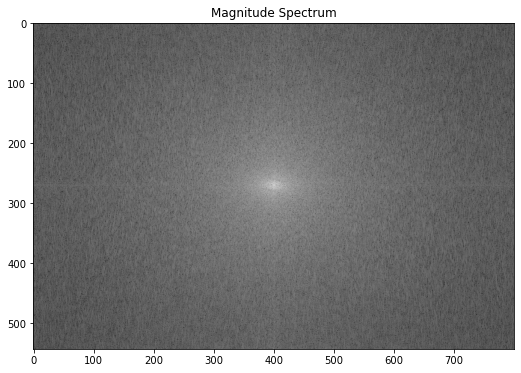

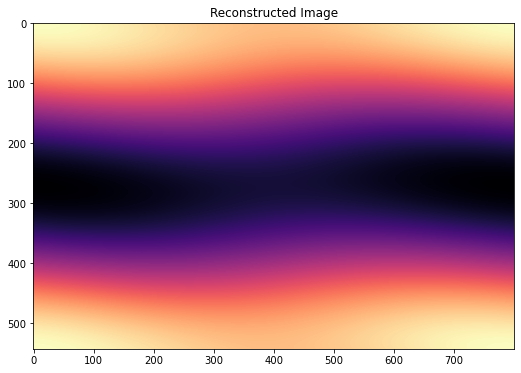

In [13]:
magnitude_spectrum = im.open("mag_spec.jpg")                     # define magnitude_specturm as the mag_spec image

display_spectrum(magnitude_spectrum)                             # display the magnitude spectrum

I_magnitude = im.new("I", magnitude_spectrum.size)
I_magnitude.paste(magnitude_spectrum, None)

# Convert the magnitude spectrum image to a NumPy array
magnitude_spectrum_array = np.array(I_magnitude)

# Undo the logarithm operation to obtain the original magnitude spectrum
original_magnitude_spectrum = np.exp(magnitude_spectrum_array)

# Reconstruct the image using the inverse Fourier transform
reconstructed_image = inverse_fourier_transform(original_magnitude_spectrum)

plt.figure(figsize=(10, 6))                                      # controls the size of the plot
plt.imshow(reconstructed_image, cmap="magma")                    # displays the image 
plt.title("Reconstructed Image")                                 # title the image
plt.show()                                                       # shows the image


I was expecting the reconstructed image to be the image of the cat, but no matter what I tried, I couldn't get the cat back !!
I then went on to assume that maybe we weren't supposed to get the cat image back..

When looking at the reconstructed image above, I thought it might graph better on a 1D graph.. I couldn't figure out how to describe what I was seeing in the reconstructed graph. All I could tell was that there were areas of higher and lower intensity which I assume are the pixels. From this assumption, I plotted the reconstructed image on another graph using ".flatten()" to change 2D to 1D.

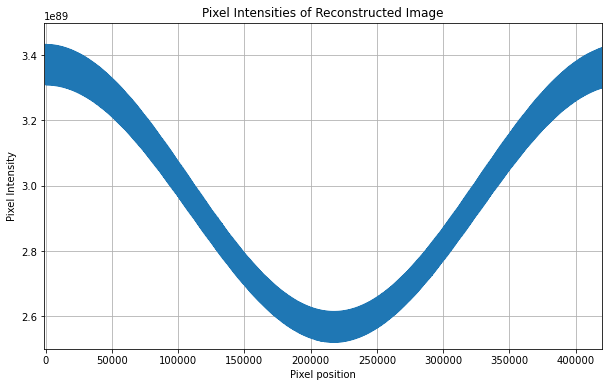

In [14]:
plt.figure(figsize=(10, 6))                                      # controls the size of the plot
plt.plot(reconstructed_image.flatten())                          # plot pixel values
plt.title("Pixel Intensities of Reconstructed Image")            # set title
plt.xlabel("Pixel position")                                     # set x-axis label
plt.ylabel("Pixel Intensity")                                    # set y-axis label
plt.xlim(-1000,420000)                                           # limit the xaxis
plt.ylim(2.5e89, 3.5e89)                                         # limit the yaxis
plt.grid()                                                       # display a grid
plt.show()                                                       # show the plot

When the pixel intensities of the reconstructed image are plotted, the resulting graph represents the intensity values of the pixels along a single axis.

The x axis represents the position of each pixel in the flattened image array and the y axis represents the intensity value of each pixel. 

The graph provides a visualization of how the pixel intensities are distributed across the image. Peaks in the graph indicate areas of higher intensity, while dips indicate areas of lower intensity.


